# gRPC interceptor benchmarking results analysis

In [53]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & clean the data

Path to two datasets: optimal and suboptimal

In [54]:
optimal_path = '../results_all_false.csv'
suboptimal_path = '../results_auth_false.csv'

In [55]:
data = pd.read_csv(optimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data['Average Latency'] = data['Average Latency'].apply(convert_latency_to_ms)
data['Max Latency'] = data['Max Latency'].apply(convert_latency_to_ms)
data['Min Latency'] = data['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed
0,2024-01-09 08:59:00.997548222 +0000 UTC m=+11....,0,0,0.000000,0.000000,0.000000,0.000000,0
1,2024-01-09 08:59:01.501918 +0000 UTC m=+11.922...,1000,1,0.491879,114.093749,0.048333,2033.017617,497.600457ms
2,2024-01-09 08:59:01.6701415 +0000 UTC m=+12.09...,1000,2,0.330337,4.133125,0.087792,3027.211458,166.491375ms
3,2024-01-09 08:59:01.774952542 +0000 UTC m=+12....,1000,3,0.298101,4.008500,0.101833,3354.557822,100.915458ms
4,2024-01-09 08:59:01.883588167 +0000 UTC m=+12....,1000,4,0.424492,6.559542,0.124417,2355.751666,107.358583ms
5,2024-01-09 08:59:01.97234275 +0000 UTC m=+12.3...,1000,5,0.426703,6.572292,0.108125,2343.548213,86.273834ms
6,2024-01-09 08:59:02.048081792 +0000 UTC m=+12....,1000,6,0.429052,4.824167,0.112667,2330.715506,73.069208ms
7,2024-01-09 08:59:02.100650583 +0000 UTC m=+12....,1000,7,0.343651,1.243125,0.108125,2909.926420,49.82425ms
8,2024-01-09 08:59:02.156347333 +0000 UTC m=+12....,1000,8,0.423489,2.850208,0.101042,2361.335574,54.29ms
9,2024-01-09 08:59:02.195096417 +0000 UTC m=+12....,1000,9,0.331639,1.906792,0.078625,3015.323161,37.50375ms


In [56]:
data_suboptimal = pd.read_csv(suboptimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data_suboptimal['Average Latency'] = data_suboptimal['Average Latency'].apply(convert_latency_to_ms)
data_suboptimal['Max Latency'] = data_suboptimal['Max Latency'].apply(convert_latency_to_ms)
data_suboptimal['Min Latency'] = data_suboptimal['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed
0,2024-01-09 08:59:00.997548222 +0000 UTC m=+11....,0,0,0.000000,0.000000,0.000000,0.000000,0
1,2024-01-09 08:59:01.501918 +0000 UTC m=+11.922...,1000,1,0.491879,114.093749,0.048333,2033.017617,497.600457ms
2,2024-01-09 08:59:01.6701415 +0000 UTC m=+12.09...,1000,2,0.330337,4.133125,0.087792,3027.211458,166.491375ms
3,2024-01-09 08:59:01.774952542 +0000 UTC m=+12....,1000,3,0.298101,4.008500,0.101833,3354.557822,100.915458ms
4,2024-01-09 08:59:01.883588167 +0000 UTC m=+12....,1000,4,0.424492,6.559542,0.124417,2355.751666,107.358583ms
5,2024-01-09 08:59:01.97234275 +0000 UTC m=+12.3...,1000,5,0.426703,6.572292,0.108125,2343.548213,86.273834ms
6,2024-01-09 08:59:02.048081792 +0000 UTC m=+12....,1000,6,0.429052,4.824167,0.112667,2330.715506,73.069208ms
7,2024-01-09 08:59:02.100650583 +0000 UTC m=+12....,1000,7,0.343651,1.243125,0.108125,2909.926420,49.82425ms
8,2024-01-09 08:59:02.156347333 +0000 UTC m=+12....,1000,8,0.423489,2.850208,0.101042,2361.335574,54.29ms
9,2024-01-09 08:59:02.195096417 +0000 UTC m=+12....,1000,9,0.331639,1.906792,0.078625,3015.323161,37.50375ms


## Plotting
### Optimal Conditions (all incersceptors disabled)

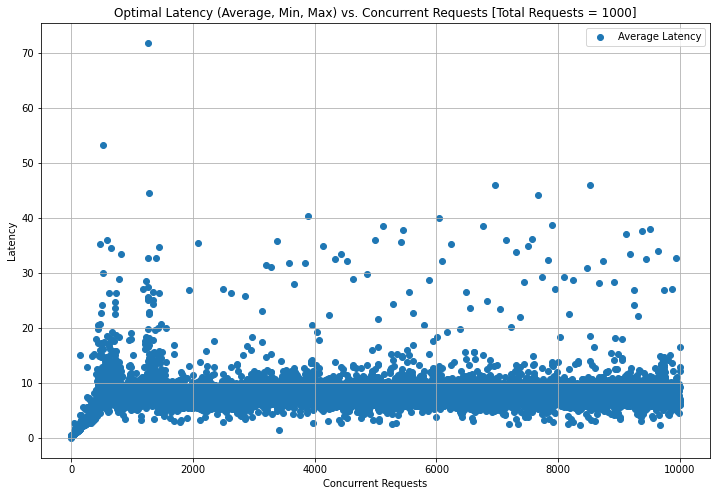

In [101]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.scatter(data['Concurrent Requests'], data['Average Latency'], marker='o', label='Average Latency')
# plt.plot(data['Concurrent Requests'], data['Min Latency (ms)'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data['Concurrent Requests'], data['Max Latency (ms)'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Optimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()

### Suboptimal results (all interceptors disabled)

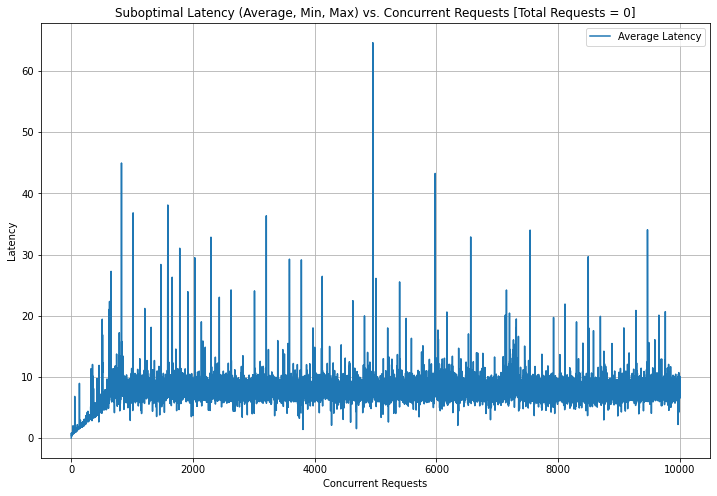

In [66]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], label='Average Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Max Latency'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Suboptimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data_suboptimal["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()


## Combine optimal and suboptimal in one plot
### Average Latency

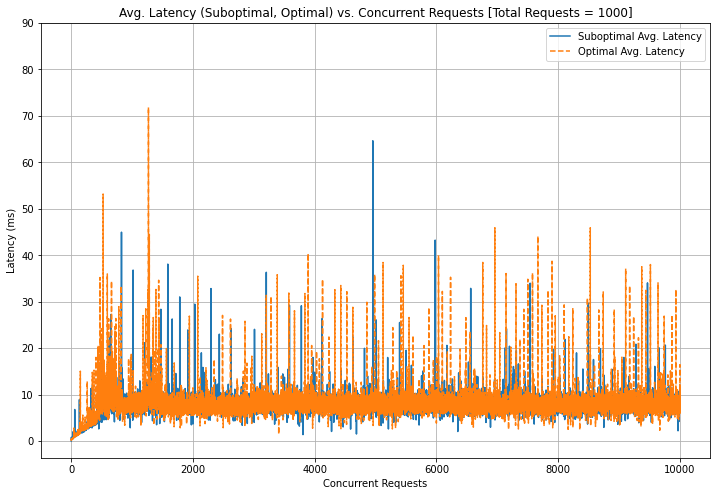

In [65]:
# Plotting Optimal and Suboptimal Average Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], label='Suboptimal Avg. Latency')
plt.plot(data['Concurrent Requests'], data['Average Latency'], linestyle='--', label='Optimal Avg. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 100, 10))
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='Concurrent Requests', ylabel='Average Latency'>

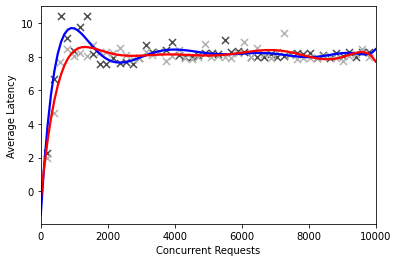

In [98]:
sns.regplot(x='Concurrent Requests',
            y='Average Latency',
            data=data,
            label='Optimal Avg. Latency',
            fit_reg=True,
            x_bins=50,
            ci=None, marker="x",
            color=".3",
            line_kws=dict(color="b"),
            order = 10)
sns.regplot(x='Concurrent Requests',
            y='Average Latency',
            data=data_suboptimal,
            label='Suboptimal Avg. Latency',
            fit_reg=True,
            x_bins=50,
            ci=None,
            marker="x",
            color=".7",
            line_kws=dict(color="r"),
            order = 10)

### Minimum Latency

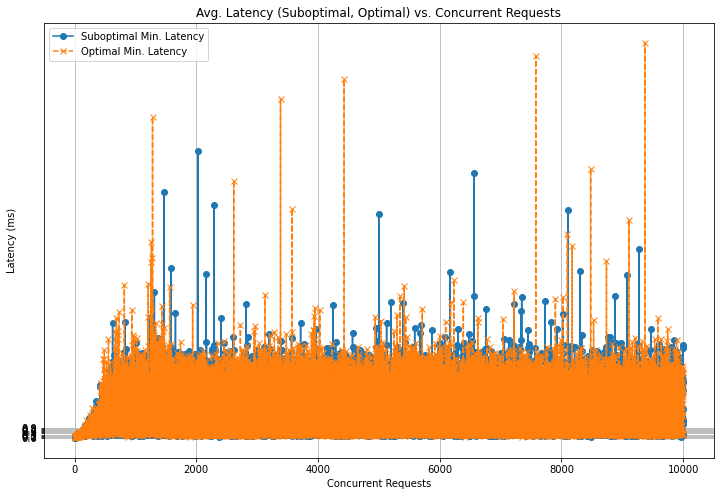

In [60]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='o', label='Suboptimal Min. Latency')
plt.plot(data['Concurrent Requests'], data['Min Latency'], marker='x', linestyle='--', label='Optimal Min. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

### Throughput

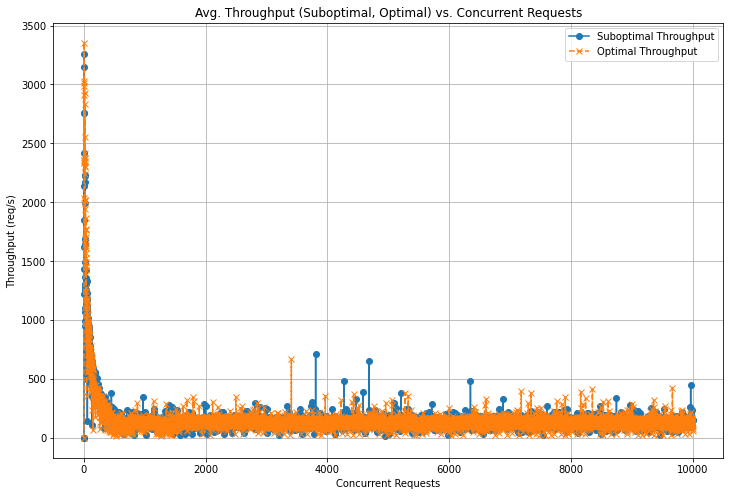

In [61]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Avg. Throughput req/s'], marker='o', label='Suboptimal Throughput')
plt.plot(data['Concurrent Requests'], data['Avg. Throughput req/s'], marker='x', linestyle='--', label='Optimal Throughput')

plt.title('Avg. Throughput (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Throughput (req/s)')
# plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='Concurrent Requests', ylabel='Avg. Throughput req/s'>

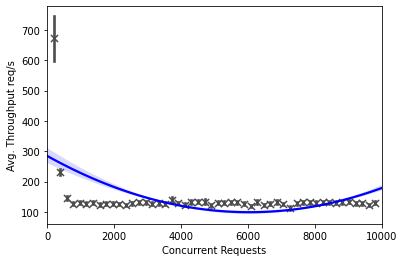

In [89]:
sns.regplot(x='Concurrent Requests', y='Avg. Throughput req/s', data=data_suboptimal, fit_reg=True, x_bins=50, ci=99, marker="x", color=".3", line_kws=dict(color="b"), order = 2)

# Pandas
### rolling average

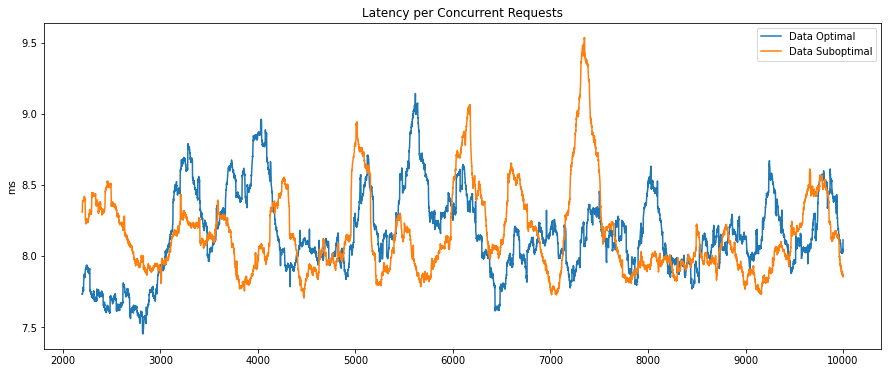

In [115]:
# Slice the data to start from the 1001st data point
data_sliced = data.iloc[2000:]
data_suboptimal_sliced = data_suboptimal.iloc[2000:]

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting
data_sliced['Average Latency'].rolling(200).mean().plot(label='Data Optimal')
data_suboptimal_sliced['Average Latency'].rolling(200).mean().plot(label='Data Suboptimal')

# Add title and y-axis label
plt.title("Latency per Concurrent Requests")
plt.ylabel("ms")

# Add legend
plt.legend()

# Show plot
plt.show()